## 6.6: Sourcing & Analyzing Time Series Data

### 1.Importing Libraries and Data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [22]:
#Define Path
path = r'C:\Users\ankit\Desktop\DataAnalysisCF\DataImmersion\Advanced Analytics & Dashboard Design\World Happiness Analysis\02 Data\Prepared Data'

In [32]:
df = pd.read_csv(os.path.join(path,'wh_region.csv'))
df.head()

,Unnamed: 0,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,region
0,0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Europe
1,1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Europe
2,2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Europe
3,3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Europe
4,4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,North America


### 2. Wrangling Time-Series Data

In [50]:
df['avg_happiness_score'] = df.groupby('year')['happiness_score'].transform('mean')
df.head()

,Unnamed: 0,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,region,avg_happiness_score
0,0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Europe,5.375734
1,1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Europe,5.375734
2,2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Europe,5.375734
3,3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Europe,5.375734
4,4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,North America,5.375734


In [116]:
#create a new column avg_happiness_score in new dataframe df_sub
df_sub = df.groupby('year', as_index=False)['happiness_score'].mean()
df_sub.rename(columns={'happiness_score': 'avg_happiness_score'}, inplace=True)
df_sub

,year,avg_happiness_score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096
5,2020,5.473240
6,2021,5.532839
7,2022,5.553575
8,2023,5.539796


In [118]:
df_sub.head()

,year,avg_happiness_score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096


In [120]:
# Set the "year" column as the index

df_sub.set_index('year', inplace=True)


In [128]:
df_sub

,avg_happiness_score
year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096
2020,5.473240
2021,5.532839
2022,5.553575
2023,5.539796


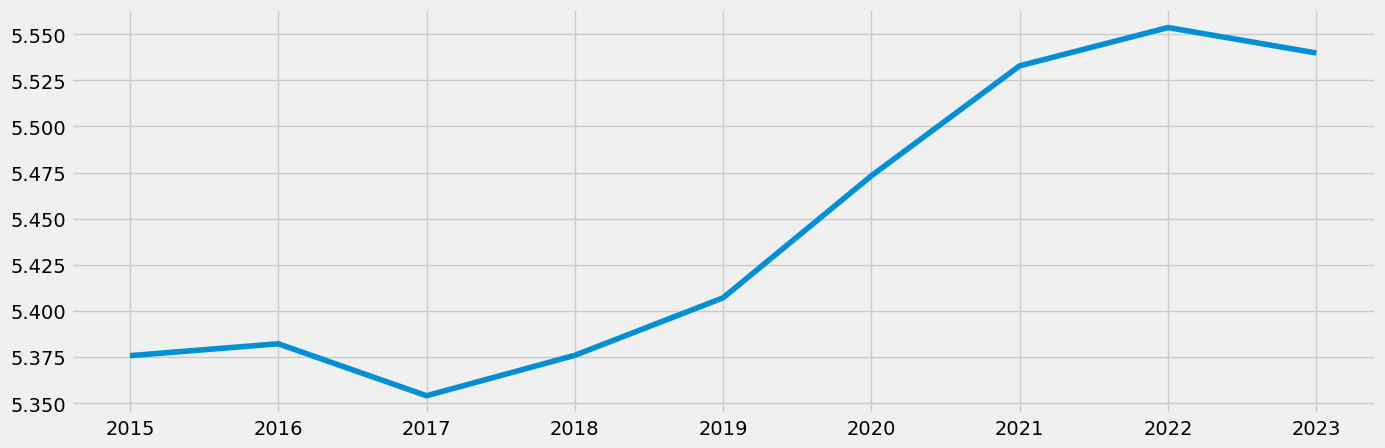

In [126]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_sub)

### 3. Time-series analysis: decomposition

In [135]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive', period = 1)

In [137]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

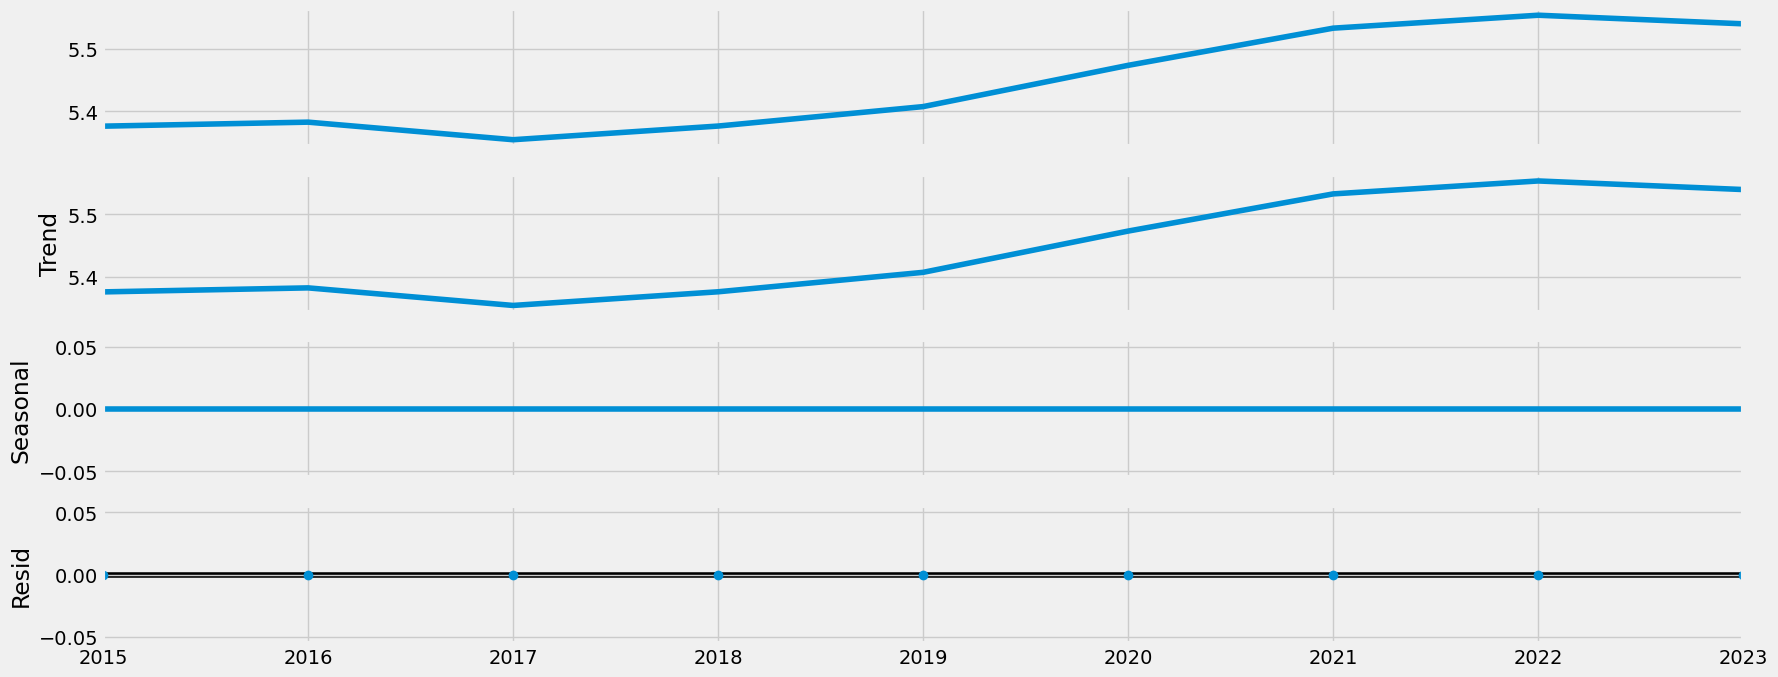

In [139]:
# Plot the separate components

decomposition.plot()
plt.show()

The first chart is the data.(The level)
The second chart is the trend which is same as level.It shows a upward dominant trend with a drop in year 2016 and 2022.
The curve is flat showing there is no seasonality.
There isn't much unexplained noise.


### 4. Testing for stationarity

In [144]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['avg_happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.494033
p-value                        0.008142
Number of Lags Used            2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


Null Hypothesis: H0 = The data has unit root (hence not stationary)
Alternate Hypothesis: H1 = The data does not has unit root (hence stationary)
p-values is less than 0.05 which is a significant value but
the test statistic value is slightly greater than Critical Value( 5%) ,[ however the test statistic value is  lesser than Critical Value( 10 %)] and hence can't reject the null hypothesis and there is a unit root in the data, and the data is non-stationary.

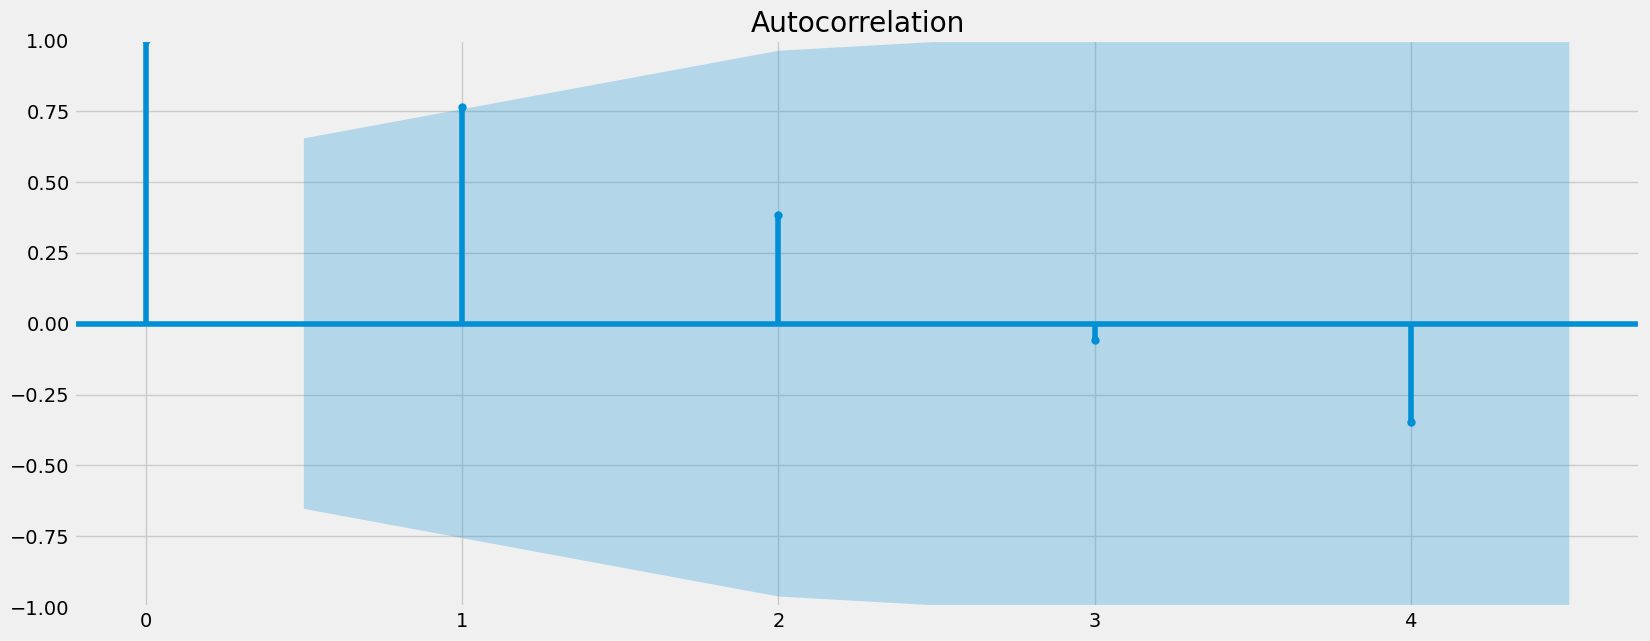

In [146]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()

There are very few lines above the blue edge of the confidence interval and this means data has lags that are significantly correlated with each other and data is non-stationary.

### 5. Stationarizing Happiness Score Data

In [202]:
# 1st round of differencing

In [149]:
data_diff = df_sub - df_sub.shift(1)

In [151]:
data_diff.dropna(inplace = True)

In [155]:
data_diff

,avg_happiness_score
year,
2016,0.006451
2017,-0.028165
2018,0.021897
2019,0.031179
2020,0.066144
2021,0.059599
2022,0.020736
2023,-0.013780


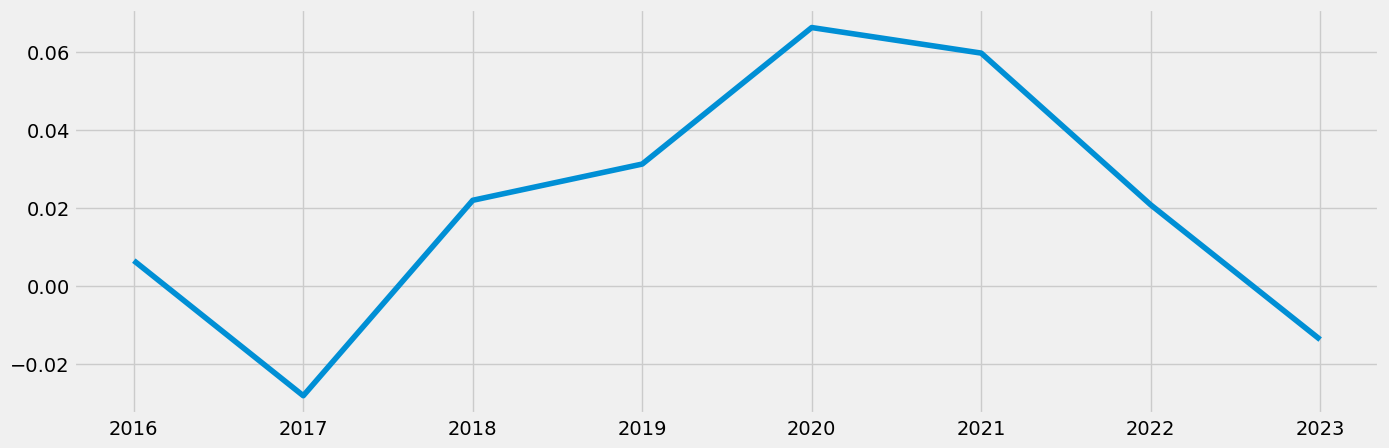

In [157]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [159]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.258284
p-value                        0.185775
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


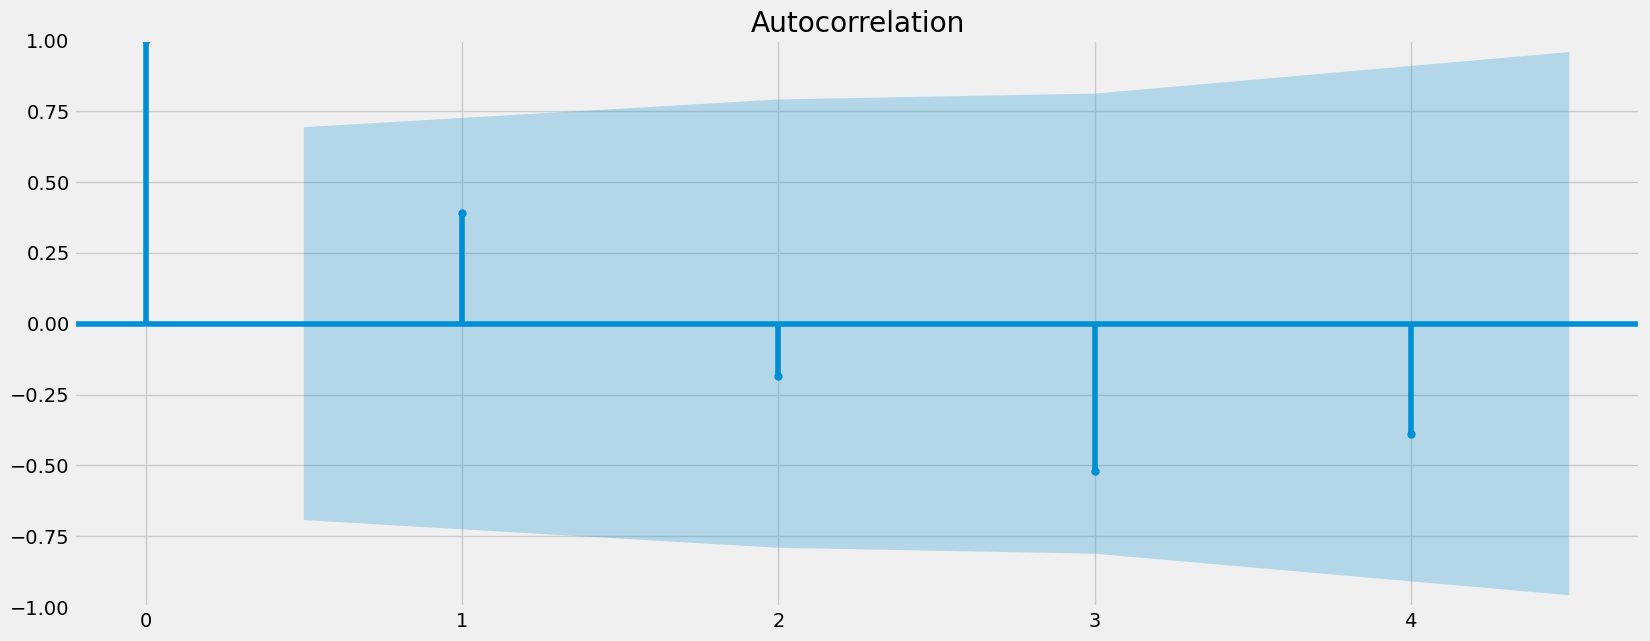

In [161]:
plot_acf(data_diff)
plt.show()

In [204]:
# 2nd round of differencing

In [163]:
data_diff2 = data_diff - data_diff.shift(1)

In [173]:
data_diff2.dropna(inplace = True)

In [175]:
data_diff2

,avg_happiness_score
year,
2017,-0.034616
2018,0.050063
2019,0.009282
2020,0.034964
2021,-0.006545
2022,-0.038863
2023,-0.034516


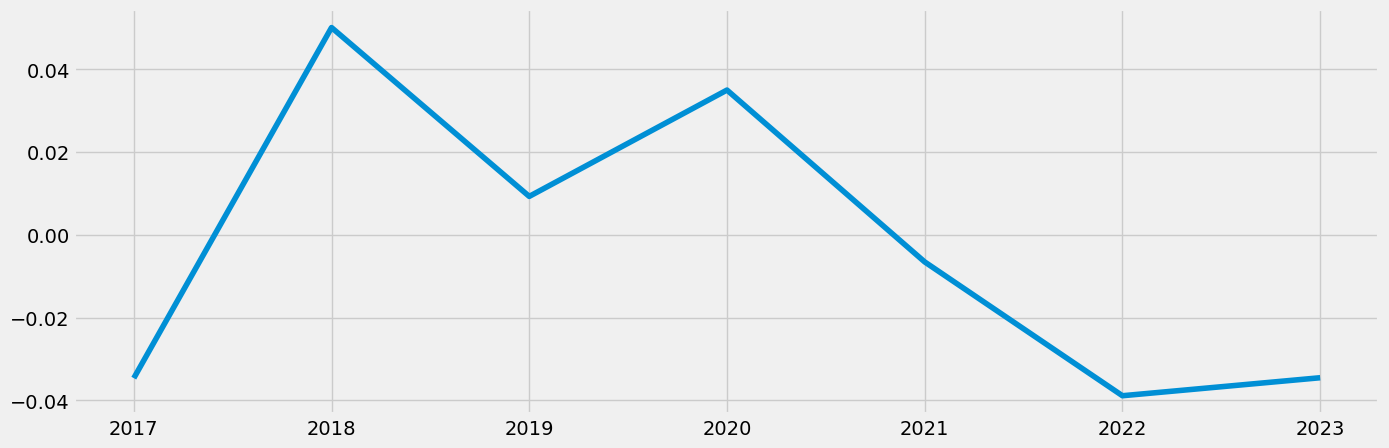

In [177]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [179]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.885335
p-value                        0.338991
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [206]:
# 3rd round of differencing

In [181]:
data_diff3 = data_diff2 - data_diff2.shift(1)

In [183]:
data_diff3.dropna(inplace = True)

In [187]:
data_diff3

,avg_happiness_score
year,
2018,0.084679
2019,-0.040780
2020,0.025682
2021,-0.041509
2022,-0.032318
2023,0.004347


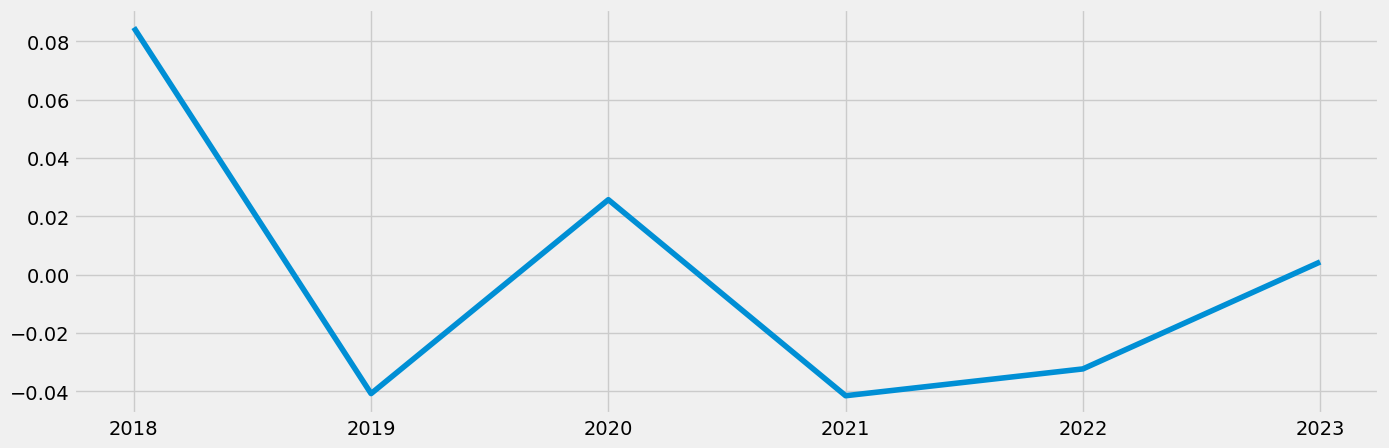

In [189]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff3)

In [191]:
dickey_fuller(data_diff3)

Dickey-Fuller Stationarity test:
Test Statistic                -5.738147e+00
p-value                        6.367040e-07
Number of Lags Used            0.000000e+00
Number of Observations Used    5.000000e+00
Critical Value (1%)           -6.045114e+00
Critical Value (5%)           -3.929280e+00
Critical Value (10%)          -2.986810e+00
dtype: float64


Test statistic is now smaller than the critical value at both the five and ten percent significance levels.P-value = 6.367040e-07  which is less than 0.05. Hence the null hypothesis can be rejected and, as a result,series can be considered stationary.

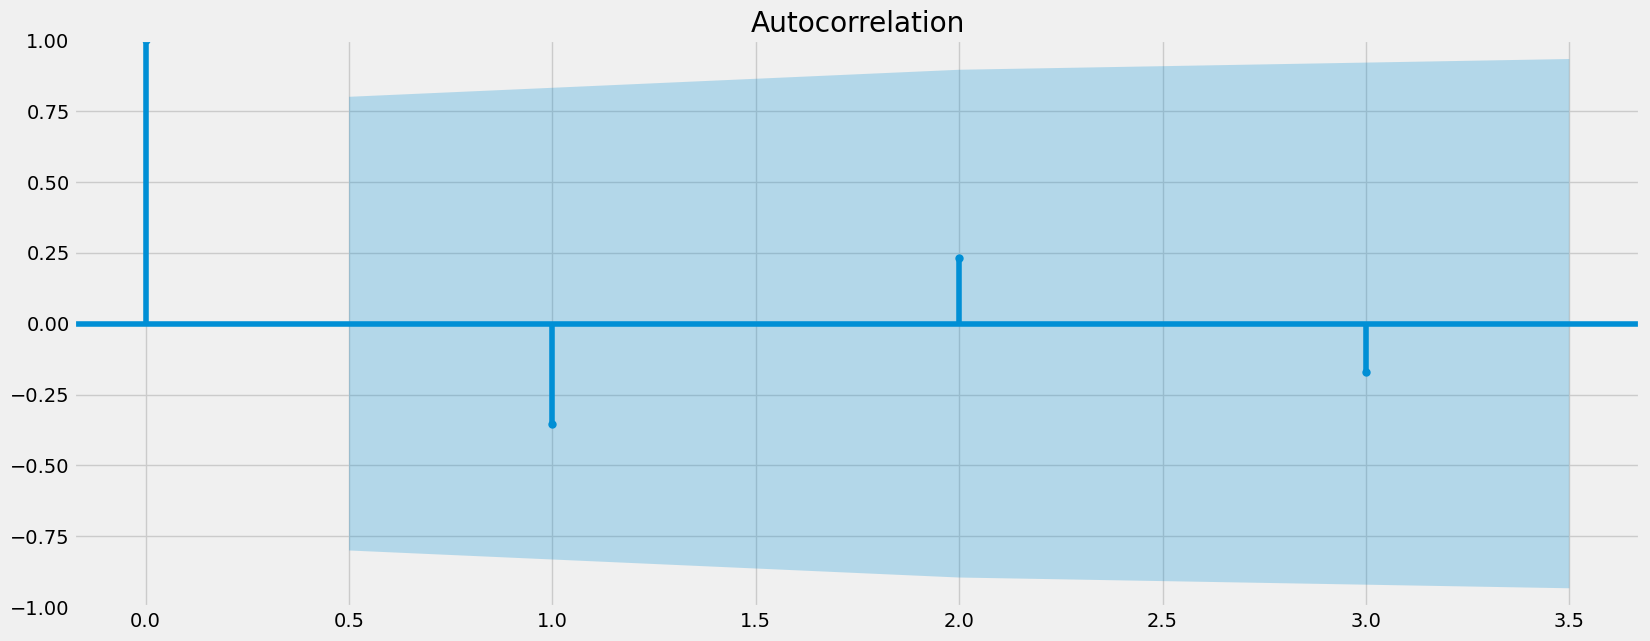

In [194]:
plot_acf(data_diff3)
plt.show()

Tthe autocorrelation plot has improved but still not perfect